<a href="https://colab.research.google.com/github/bismahashim/Assignment/blob/main/Assignment_Simple_Linear_Regression_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
data.shape

(30, 2)

In [7]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [8]:
data=data.drop_duplicates()
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


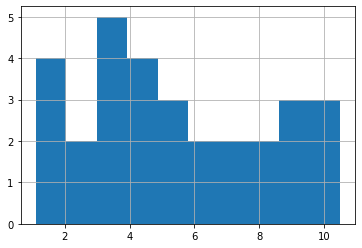

In [9]:
data['YearsExperience'].hist()

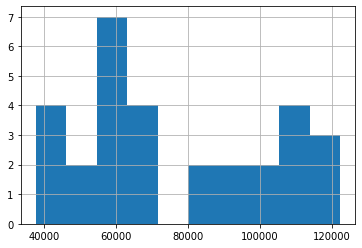

In [10]:
data['Salary'].hist()

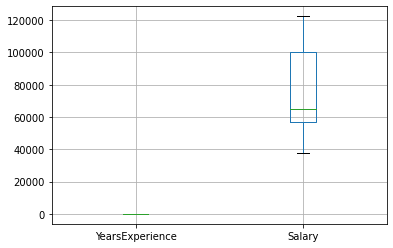

In [11]:
data.boxplot(column=['YearsExperience','Salary'])

In [12]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [13]:
data.values

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [14]:
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.51 -1.36]
 [-1.44 -1.11]
 [-1.37 -1.42]
 [-1.19 -1.2 ]
 [-1.12 -1.34]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


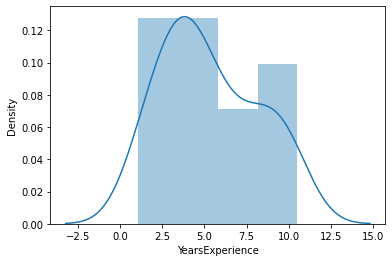

In [17]:
sns.distplot(data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


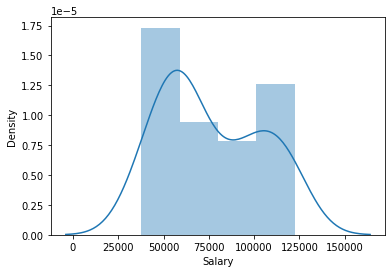

In [18]:
sns.distplot(data['Salary'])

In [19]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [20]:
data=data.rename({'YearsExperience':'exp', 'Salary':'salary'},axis=1)
data.head()

,exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
model = smf.ols("salary~exp",data=data).fit()

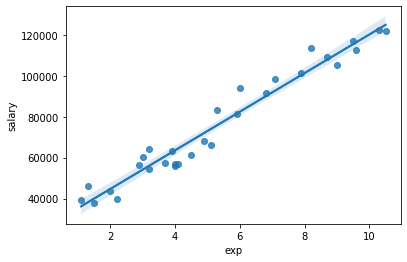

In [22]:
sns.regplot(x="exp", y="salary", data=data)

In [23]:
model.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [24]:
model.tvalues , model.pvalues

(Intercept    11.346940
 exp          24.950094
 dtype: float64, Intercept    5.511950e-12
 exp          1.143068e-20
 dtype: float64)

In [25]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [26]:
newdata=pd.Series([3,8])
newdata

0    3
1    8
dtype: int64

In [27]:
data_pred=pd.DataFrame(newdata,columns=['exp'])

In [28]:
model.predict(data_pred)

0     54142.087163
1    101391.898770
dtype: float64